# Predicting Lifetime value of car insurance customers using data in the marketing database

## Summary
As a digital marketer I know that predicting the lifetime value of customers based on the initial purchase data is often worthwhile. Some customers will return their order and get a refund whilst others will become repeat purchasers. This means that some customers are worth spending more on in terms of promotions and adspend per conversion than others. The lifetime value of customers can also be fed back into Google Ads, Microsoft and Meta Ads to improve their algorithmic bidding. In this project I aim to create models to predict lifetime value using data from a car insurance customer database. The lifetime value outputs are for feeding back into the ads platforms as the conversions happen.

## The data

I found a dataset used in this project on Kaggle. The columns include lifetime value and other related customer data including car size, location, income and policy level. The data was originally hosted on the IBM website but the link to it has since between pullled. The link to it on Kaggle is below. 
https://www.kaggle.com/datasets/pankajjsh06/ibm-watson-marketing-customer-value-data/data

## About Me and my project
My name is Matthew Freedman I have been a digital marketer focused on Google Ads, Microsoft Ads and Meta Ads optimisation for 14 years. As the industry has changed I have looked to improve my skillset by learning about the algorithms that are running our lives and are increasing important in marketing. I chose to do the Imperial Business School professional certificate in Machine Learning and Artificial intelligence which introduced me to the field.

My Linkedin is here: https://www.linkedin.com/in/matthewppc/

## Shout outs
A huge shout out to Viviana Marquez and Muhammad Ali Chaudhry who have tutored me through the course in Machine Learning and Artifical Intelligence set up by Imperial Business School.

# Data Summary

The data is car insurance data from the USA. It was found on Kaggle and I chose it as a good example of a data set you could use to explore lifetime value predictions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. Data Loading

In [2]:
core_data = pd.read_csv("Dataset/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [3]:
core_data.head(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


# 2. Exploratory Data Analysis

In [4]:
## Lets do some initial exploration
core_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

There are 23 columns each with 9134 rows. Lets looking into the numeric columns

In [5]:
numeric_data =  core_data.select_dtypes(include=["number"])
print("There are these", len(numeric_data.columns), "numeric columns, lets explore the data more")

There are these 8 numeric columns, lets explore the data more


In [6]:
print("The columns are",numeric_data.columns)

The columns are Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')


In [7]:
numeric_data.describe().round(2)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00
mean,8004.94,37657.38,93.22,15.10,48.06,0.38,2.97,434.09
std,6870.97,30379.90,34.41,10.07,27.91,0.91,2.39,290.50
min,1898.01,0.00,61.00,0.00,0.00,0.00,1.00,0.10
25%,3994.25,0.00,68.00,6.00,24.00,0.00,1.00,272.26
50%,5780.18,33889.50,83.00,14.00,48.00,0.00,2.00,383.95
75%,8962.17,62320.00,109.00,23.00,71.00,0.00,4.00,547.51
max,83325.38,99981.00,298.00,35.00,99.00,5.00,9.00,2893.24


#### Now lets look at the correlation of the lifetime value vs numeric fields

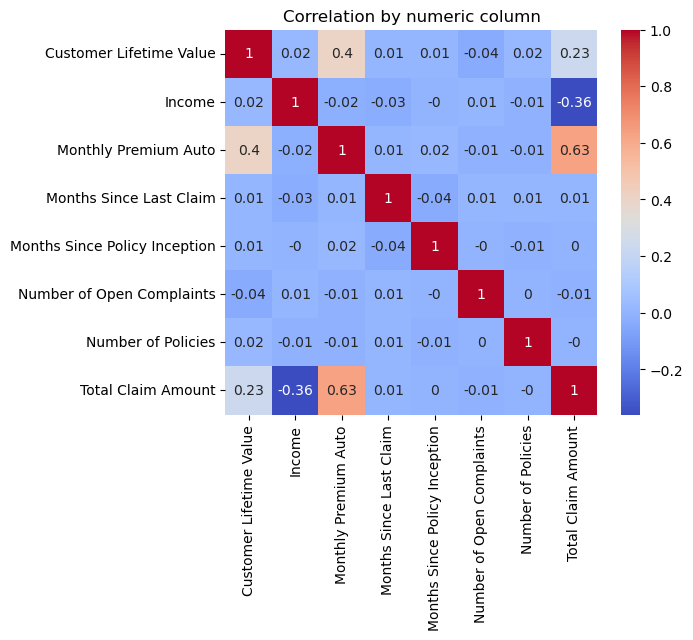

In [8]:
numeric_data_corr = numeric_data.corr().round(2)
plt.figure(figsize = (6,5))
sns.heatmap(numeric_data_corr, cmap = 'coolwarm',annot = True)
plt.title("Correlation by numeric column")
plt.show()

From the correlation chart above I can see that Monthly Premium Auto is the most correleated factor to Customer Lifetime Value with a 40% positive correlation. I can also see that the Total Claim Amount is correlated positively at 23% however Total Claim Amount wouldn't be known to the insurer at the time of transaction, unless the customer was an existing one adding an additional policy. Therefore I will be removing that column from the data when building the model

##### Now lets look at the object/string/text columns

In [9]:
text_data = core_data.select_dtypes(include = ["object","string"])
print("There are", len(text_data.columns), "text columns")

There are 16 text columns


In [10]:
print("The columns are", text_data.columns)

The columns are Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')


In [13]:
# Lets looking at how many unique values each text column has
for i in text_data.columns:
    get_columns = text_data[i]
    print("The number of unique values in", i,"is", get_columns.nunique())  

The number of unique values in Customer is 9134
The number of unique values in State is 5
The number of unique values in Response is 2
The number of unique values in Coverage is 3
The number of unique values in Education is 5
The number of unique values in Effective To Date is 59
The number of unique values in EmploymentStatus is 5
The number of unique values in Gender is 2
The number of unique values in Location Code is 3
The number of unique values in Marital Status is 3
The number of unique values in Policy Type is 3
The number of unique values in Policy is 9
The number of unique values in Renew Offer Type is 4
The number of unique values in Sales Channel is 4
The number of unique values in Vehicle Class is 6
The number of unique values in Vehicle Size is 3


In [14]:
numeric_columns = numeric_data.columns
numeric_wo_ltv_columns = numeric_columns.drop(["Customer Lifetime Value"])
numeric_wo_ltv_columns

Index(['Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

In [15]:
text_ltv_data = core_data.drop(columns = numeric_wo_ltv_columns)
text_ltv_data = text_ltv_data.drop(columns = ["Customer"])
text_ltv_data_dummies = pd.get_dummies(text_ltv_data)
text_ltv_data_dummies

,Customer Lifetime Value,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,False,False,False,False,True,True,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,6979.535903,True,False,False,False,False,True,False,False,True,...,False,True,False,False,False,False,False,False,True,False
2,12887.431650,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,7645.861827,False,True,False,False,False,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False
4,2813.692575,False,False,False,False,True,True,False,True,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,False,True,False,False,False,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False
9130,3096.511217,False,True,False,False,False,False,True,False,True,...,False,True,False,False,False,False,False,False,True,False
9131,8163.890428,False,True,False,False,False,True,False,False,True,...,False,True,False,False,False,False,False,False,True,False
9132,7524.442436,False,True,False,False,False,True,False,False,True,...,False,True,False,False,False,False,False,True,False,False


In [14]:
print("Getting dummies produces",text_ltv_data_dummies.columns.nunique(), "columns")

Getting dummies produces 117 columns


##### Now lets look at the correlation between string/object values and lifetime value

In [16]:
text_ltv_data_corr = text_ltv_data_dummies.corr().round(2)
print(text_ltv_data_corr["Customer Lifetime Value"].sort_values(ascending = False))

Customer Lifetime Value        1.00
Vehicle Class_Luxury SUV       0.19
Vehicle Class_SUV              0.18
Vehicle Class_Luxury Car       0.18
Coverage_Premium               0.13
                               ... 
Renew Offer Type_Offer4       -0.04
Renew Offer Type_Offer2       -0.06
Vehicle Class_Two-Door Car    -0.10
Coverage_Basic                -0.15
Vehicle Class_Four-Door Car   -0.20
Name: Customer Lifetime Value, Length: 117, dtype: float64


Factors that positivity influence lifetime value include the insured car being an SUV or Luxury Car, meanwhile if the car is a Vehicle with 4 doors it negatively impacts lifetime value. Being a 2 door car also negatively influences lifetime value.

In [17]:
text_ltv_data_corr["Customer Lifetime Value"].sort_values(ascending = False).head(10)

Customer Lifetime Value      1.00
Vehicle Class_Luxury SUV     0.19
Vehicle Class_SUV            0.18
Vehicle Class_Luxury Car     0.18
Coverage_Premium             0.13
Renew Offer Type_Offer1      0.09
Vehicle Class_Sports Car     0.09
Coverage_Extended            0.07
EmploymentStatus_Employed    0.04
Effective To Date_1/14/11    0.03
Name: Customer Lifetime Value, dtype: float64

In [18]:
text_ltv_data_corr["Customer Lifetime Value"].sort_values(ascending = False).tail(10)

Effective To Date_2/14/11     -0.02
Policy_Corporate L3           -0.02
Policy_Corporate L2           -0.02
EmploymentStatus_Unemployed   -0.03
Marital Status_Single         -0.03
Renew Offer Type_Offer4       -0.04
Renew Offer Type_Offer2       -0.06
Vehicle Class_Two-Door Car    -0.10
Coverage_Basic                -0.15
Vehicle Class_Four-Door Car   -0.20
Name: Customer Lifetime Value, dtype: float64

##### Now lets explore the target variable - Customer Lifetime value

In [20]:
lifetime_value = np.array(core_data["Customer Lifetime Value"])
print("Mean of the target variable is", np.round(np.mean(lifetime_value),2))
print("Maximum of the target variable is", np.round(np.max(lifetime_value),2))
print("Minimum of the target variable is", np.round(np.min(lifetime_value),2))
print("Standard deviation of the target variable is", np.round(np.std(lifetime_value),2))

Mean of the target variable is 8004.94
Maximum of the target variable is 83325.38
Minimum of the target variable is 1898.01
Standard deviation of the target variable is 6870.59


In [21]:
core_data_sorted = core_data.sort_values(by = "Customer Lifetime Value", ascending = False)

Now lets look at the highest and lowest customer Life Values. We have some very high lifetime value outliers.

In [22]:
core_data_sorted["Customer Lifetime Value"].head(20).round(2)

5716    83325.38
1974    74228.52
6252    73225.96
7283    67907.27
5279    66025.75
7303    64618.76
3760    61850.19
8825    61134.68
4126    60556.19
2908    58753.88
6584    58207.13
79      58166.55
7556    57520.50
4915    56675.94
6461    55277.45
3145    52811.49
6554    51426.25
2190    51337.91
6569    51016.07
7835    50568.26
Name: Customer Lifetime Value, dtype: float64

In [23]:
core_data_sorted["Customer Lifetime Value"].tail(20)

5095    2064.697955
717     2064.458781
4958    2063.387895
7794    2052.948967
238     2050.623512
3464    2034.993043
4702    2030.783687
2127    2009.772923
702     2004.350666
1916    2004.350666
4818    2004.350666
3665    2004.350666
7135    2004.350666
5375    2004.350666
5894    1994.774936
6711    1940.981221
7083    1918.119700
2771    1904.000852
2210    1898.683686
6037    1898.007675
Name: Customer Lifetime Value, dtype: float64

Lets do a scatterplot of the most correlated feature (Monthly Premium Auto) with Customer Lifetime Value

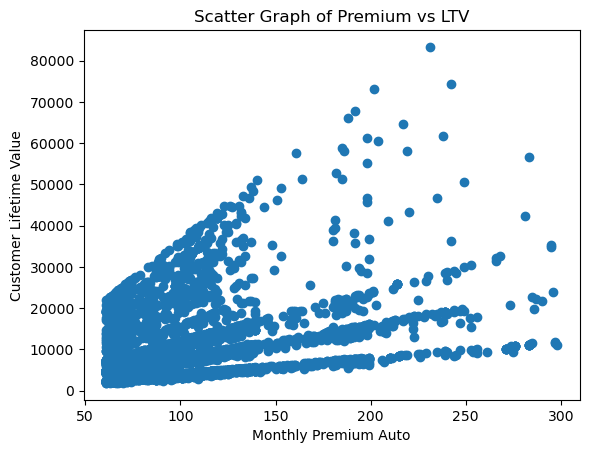

In [24]:
import matplotlib.pyplot as plt
scatter_x = core_data["Monthly Premium Auto"]
scatter_y = core_data["Customer Lifetime Value"]
plt.scatter(scatter_x,scatter_y)
plt.xlabel("Monthly Premium Auto")
plt.ylabel("Customer Lifetime Value")
plt.title("Scatter Graph of Premium vs LTV")
plt.show()

##### It looks like there are several linear relationships spanning out of several possible categories. It might be possible to model this first by putting each data point into categories and then using multiple linear regression lines.

Now lets create a histogram of Lifetime Values. From the chart below I can conclude that most of the LTVs are below 10,000 USD and then there are fewer in each further stepped increase.

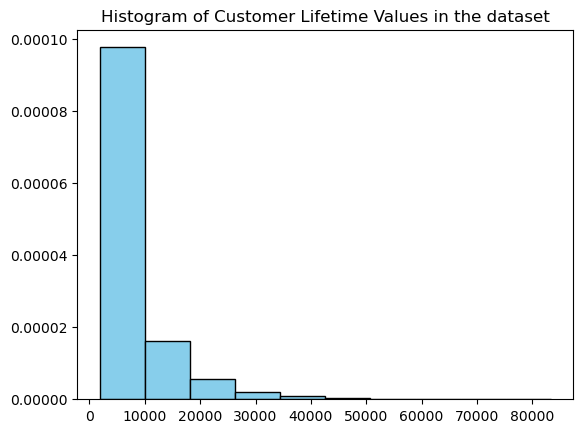

In [23]:
# Lets create a histogram of lifetime value.
plt.hist(lifetime_value,bins=10, color = "skyblue",edgecolor = "black",density=True)
plt.title("Histogram of Customer Lifetime Values in the dataset")
plt.show()

Lifetime value (LTV) is positively skewed with the bulk of the data being under 10,000 USD and then a long tail that decays as it the LTVs get larger.

In [28]:
lifetime_value_low = np.sum(lifetime_value < 10000)
lifetime_value_high = np.sum(lifetime_value > 10000)
lifetime_value_high = np.sum(lifetime_value > 10000)
lifetime_value_very_high = np.sum(lifetime_value > 20000)
print("Number of Lifetime values below $10000 are", lifetime_value_low,"| Number of Lifetime values above $10000 are",lifetime_value_high, "| Number of Lifetime values of over $20000 are",lifetime_value_very_high  )

Number of Lifetime values below $10000 are 7248 | Number of Lifetime values above $10000 are 1886 | Number of Lifetime values of over $20000 are 575


#### Now lets look at the all the unique values in categorical columns

In [29]:
for i in text_data.columns:
    print(i,"contains",text_data[i].unique())   

Customer contains ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
State contains ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Response contains ['No' 'Yes']
Coverage contains ['Basic' 'Extended' 'Premium']
Education contains ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Effective To Date contains ['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']
EmploymentStatus contains ['Employed' 'Unemployed' 'Medical Leave' 'Disab

Based on this above Coverage, Education, Effective To Date and Vehicle size are ordinal columns

# 2. Feature Enginerring. 
##### Lets do some feature engineering.

##### How many NAs are there

In [30]:
print("The number of NAs are", core_data.isna().sum())

The number of NAs are Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64


##### Celebrate, we have no NAs! Lets see what happens if we put everything through onehotencoder

In [31]:
print("Remove columns about claims and the customer ID column as we want to predict LTV before claims are made")
core_data = core_data.drop(columns = ["Total Claim Amount","Months Since Last Claim","Customer"])

Remove columns about claims and the customer ID column as we want to predict LTV before claims are made


In [32]:
X = core_data.drop(columns = ["Customer Lifetime Value"])
y = core_data["Customer Lifetime Value"]

In [33]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [34]:
X.columns = [str(col) for col in X.columns]  # Convert all column names to strings

In [35]:
ordinal_features = ["Vehicle Size", "Coverage","Education"]
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features = [col for col in categorical_features if col not in ordinal_features]

In [41]:
#check numeric features are right
numeric_features

['Income',
 'Monthly Premium Auto',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies']

In [42]:
#check columns features are right
categorical_features

['State',
 'Response',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class']

In [43]:
# Categories for ordinal features

categories = [
    ['Small', 'Medsize', 'Large'], 
    ['Basic', 'Extended', 'Premium'], 
    ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']  
]

In [44]:
# Set up preprocessor

preprocessor = ColumnTransformer(
    transformers=[
        ("ord", OrdinalEncoder(categories=categories), ordinal_features),
        ('num', RobustScaler(), numeric_features),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)  
    ]
)

# 3. Train test split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [46]:
print("Number of training set rows are", X_train.shape[0],
"Number of Test set rows are", X_test.shape[0])

Number of training set rows are 6850 Number of Test set rows are 2284


In [47]:
X_train_processed_ = preprocessor.fit_transform(X_train)
X_test_processed_ = preprocessor.transform(X_test)

In [48]:
numerical_column_names = numeric_features
ordinal_column_names = ordinal_features

# The get_feature_names_out method generates the names of the new columns created by OneHotEncoder for categorical columns
categorical_column_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine the names of numerical and categorical columns into a list
all_column_names = list(numerical_column_names) + list(ordinal_column_names) + list(categorical_column_names)

In [49]:
X_train_processed_df = pd.DataFrame(X_train_processed_, columns=all_column_names)
X_test_processed_df = pd.DataFrame(X_test_processed_, columns=all_column_names)

# 4. Regression Tests

Lets find out what the baseline metrics are

In [50]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

y_pred_mean = np.full_like(y_test,np.mean(y_train))
mae_baseline = mean_absolute_error(y_test, y_pred_mean)
rmse_baseline = root_mean_squared_error(y_test,y_pred_mean)
mape_baseline = mean_absolute_percentage_error(y_test, y_pred_mean)
r2_baseline = r2_score(y_test,y_pred_mean)

print("Baseline mean absolute error is", np.round(mae_baseline,2))
print("Baseline root mean absolute error is", np.round(rmse_baseline,2))
print("Baseline mean absolute percentage error is",np.round(mape_baseline,2))
print("Baseline R2 Score is", np.round(r2_baseline,3))

Baseline mean absolute error is 4320.02
Baseline root mean absolute error is 6813.79
Baseline mean absolute percentage error is 0.73
Baseline R2 Score is -0.0


#### Import some juicy machine learning models. As this is a regression task all the models are regression based though some are adaptations of classification models e.g. Random Forest Regressor.

In [127]:

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


In [128]:
#create a dictionary of the machine leanring models
models = {
        "MLP Regressor": MLPRegressor(learning_rate_init = 0.005, max_iter = 500),
        "Linear Regression": LinearRegression(),
        "Lasso Regression": Lasso(),
        "Ridge Regression": Ridge(),
        "Decision Trees": DecisionTreeRegressor(),
        "Ada Boost Regressor":  AdaBoostRegressor(),
        "Random Forest Regressor": RandomForestRegressor(),
        "Support Vector Regressor": SVR(),
        "Gradient Boosting Regressor": GradientBoostingRegressor(),  
       }

In [129]:
#Create a function to train machine learning models and get performance metrics
def my_model_training(models,X,y):
    results = []
    kf = KFold(n_splits=4,shuffle=True)
    for name, model in models.items():
        mae_array = []
        rmse_array = []
        mape_array = []
        r2_array = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.loc[train_index], X.loc[test_index]
            y_train, y_test = y[train_index], y[test_index]
            X_train_processed = preprocessor.fit_transform(X_train)
            X_test_processed = preprocessor.transform(X_test)
            model.fit(X_train_processed, y_train)
            y_pred = model.predict(X_test_processed)
            mae_array.append(mean_absolute_error(y_test,y_pred))
            rmse_array.append(root_mean_squared_error(y_test,y_pred))
            mape_array.append(mean_absolute_percentage_error(y_test,y_pred))
            r2_array.append(r2_score(y_test,y_pred))
        mae = np.mean(mae_array)
        rmse = np.mean(rmse_array)
        mape = np.mean(mape_array)
        r2 = np.mean(r2_array)
        results.append({
            "Models": name,
            "RMSE": np.round(rmse,2),
            "R2": np.round(r2,2),
            "MAPE": np.round(mape,2),
            "MAE": np.round(mae,2)
        })
        print("I've finished training",name)
    return results

In [130]:
# train machine learning models
the_results_1st_try = my_model_training(models,X, y)

C:\Users\matth\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\matth\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\matth\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\matth\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


I've finished training MLP Regressor
I've finished training Linear Regression
I've finished training Lasso Regression
I've finished training Ridge Regression
I've finished training Decision Trees
I've finished training Ada Boost Regressor
I've finished training Random Forest Regressor
I've finished training Support Vector Regressor
I've finished training Gradient Boosting Regressor


In [131]:
the_results_1st_try = pd.DataFrame(the_results_1st_try).sort_values(by=["RMSE","R2","MAPE","MAE"], ascending=[True, True, True,True])

In [132]:
the_results_1st_try

,Models,RMSE,R2,MAPE,MAE
6,Random Forest Regressor,3795.50,0.69,0.10,1444.09
8,Gradient Boosting Regressor,3871.41,0.68,0.14,1736.51
0,MLP Regressor,4670.19,0.54,0.29,2636.13
4,Decision Trees,5094.39,0.45,0.12,1652.00
2,Lasso Regression,6314.69,0.15,0.60,3916.84
3,Ridge Regression,6315.94,0.15,0.60,3919.24
1,Linear Regression,6325.66,0.15,0.59,3920.47
5,Ada Boost Regressor,6450.39,0.10,0.73,5133.51
7,Support Vector Regressor,7196.48,-0.10,0.50,4045.57


Random Forest Regressor is the best model when using default hyperparameters having best resutls for RMSE, R2, MAPE and MAE. The second best one is Gradinet Booster Regressor - both are decision tree based regressors. The MLP Regressor is 3rd. It is a neural network built for regression however the error notices say that the neural network didn't converge perhaps due to a slow learning rate, or not enough interations. Interestingly basic Decision trees was 2nd best when looking at the metrics MAE and MAPE. This would suggest that that algorithm has the most error for already large LTVs. Now lets do a second check on the Random Forest Regressor with train-train-split.

In [133]:
best_model = RandomForestRegressor()
best_model.fit(X_train_processed_, y_train)
y_pred = best_model.predict(X_test_processed_)
best_model_residuals = y_pred - y_test

In [134]:
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("RMSE:",np.round(rmse,2),"r2 score:", np.round(r2,2),"MAPE:",np.round(mape,2),"MAE:",np.round(mae,2))

RMSE: 3735.02 r2 score: 0.7 MAPE: 0.1 MAE: 1406.72


It does have a slightly higher RMSE when doing train test split rather than KFold

In [135]:
residual_df = pd.DataFrame({"y_test":np.round(y_test,2),
                            "y_pred": np.round(y_pred,2),
                            "residuals":np.round(best_model_residuals,2)})
residual_df = residual_df.sort_values(by = "residuals", ascending = False)

Lets see how large the residuals are. It's an issue if there are residuals that are very large as when fed back to Google/Microsoft/Meta it could cause their algrorithms to concentrate too much on certain audience segments.

In [136]:
residual_df.head(10)

,y_test,y_pred,residuals
810,18361.56,36052.03,17690.47
4350,22062.55,37538.37,15475.82
8415,19228.46,33284.55,14056.08
5768,18726.15,30960.26,12234.11
5498,12519.80,24302.16,11782.36
1008,22986.15,34408.21,11422.06
7328,16350.13,27258.09,10907.96
4099,14710.43,25572.42,10861.99
7201,14789.62,25033.71,10244.09
4403,13432.00,23645.76,10213.76


The largest residuals are for large real LTVs (y_test)

In [137]:
residual_df.tail(10)

,y_test,y_pred,residuals
50,36707.43,14515.51,-22191.92
6554,51426.25,28391.73,-23034.52
7943,44520.14,21333.53,-23186.61
4126,60556.19,37009.35,-23546.84
5403,44856.11,19999.99,-24856.13
6461,55277.45,28884.01,-26393.44
4388,44468.02,15932.40,-28535.62
2908,58753.88,28158.70,-30595.18
7556,57520.50,21069.73,-36450.77
5716,83325.38,30532.28,-52793.10


Negative residuals are also for real LTVs that are high

In [138]:
residuals_more_2000 = residual_df[residual_df["residuals"] > 2000].count()
print(residuals_more_2000["residuals"], "are more than 2000 usd out of", y_test.count())

295 are more than 2000 usd out of 2284


In [139]:
residuals_less_neg2000 = residual_df[residual_df["residuals"] < -2000].count()
print(residuals_less_neg2000["residuals"], "are less than 2000 usd out of", y_test.count())

155 are less than 2000 usd out of 2284


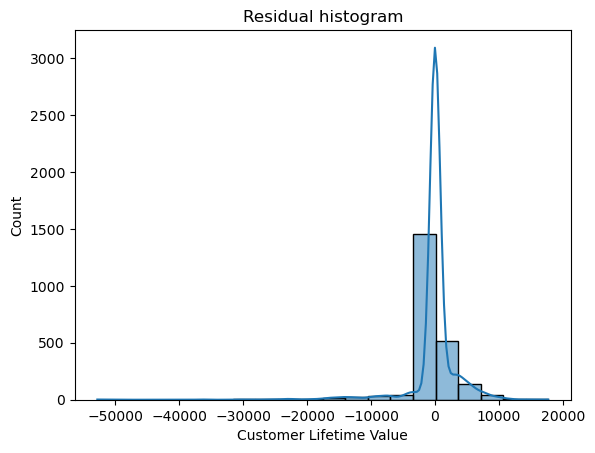

In [140]:
# Now lets plot the residuals

import seaborn as sns
sns.histplot(best_model_residuals, bins=20, kde=True)
plt.title("Residual histogram")
plt.show()

The most extreme errors are under predictions. I think under predicted LTVs are better than over predictions when feeding LTVs up to Google Ads as we don't want Google's bidding algorithm over bidding against certain outlier characteristics. For example the largest LTV underprediction is 28693 compared to a real value of 83325. 28693 is already high enough to signify to Google that it's a high value customer.

Lets have a quick preview of the importance of different features

In [141]:
# Get importance scores
importances = best_model.feature_importances_
# Map them to feature names
feature_names = preprocessor.get_feature_names_out()
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
importance_df.head(30)

,Feature,Importance
7,num__Number of Policies,0.474323
4,num__Monthly Premium Auto,0.243068
5,num__Months Since Policy Inception,0.032372
3,num__Income,0.030650
2,ord__Education,0.009996
75,cat__Gender_M,0.007294
0,ord__Vehicle Size,0.006859
6,num__Number of Open Complaints,0.005817
70,cat__Effective To Date_2/9/11,0.005594
1,ord__Coverage,0.004891


According to this the most important features are No. of policies and monthly premium amount. Other features are below 10%. I'm going to test what would happen if we had a more limited number of features  based on importance in the table above.

In [142]:
X_edited = X[["Number of Policies","Monthly Premium Auto","Months Since Policy Inception","Income","Education"]]

In [143]:
X_edited

,Number of Policies,Monthly Premium Auto,Months Since Policy Inception,Income,Education
0,1,69,5,56274,Bachelor
1,8,94,42,0,Bachelor
2,2,108,38,48767,Bachelor
3,7,106,65,0,Bachelor
4,1,73,44,43836,Bachelor
...,...,...,...,...,...
9129,2,73,89,71941,Bachelor
9130,1,79,28,21604,College
9131,2,85,37,0,Bachelor
9132,3,96,3,21941,College


### Now lets go through the process again

In [144]:
numeric_features = X_edited.select_dtypes(include=['int64', 'float64']).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_features)
    ]
)

In [145]:
the_results_2 = my_model_training(models,X_edited,y)

C:\Users\matth\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\matth\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\matth\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


I've finished training MLP Regressor
I've finished training Linear Regression
I've finished training Lasso Regression
I've finished training Ridge Regression
I've finished training Decision Trees
I've finished training Ada Boost Regressor
I've finished training Random Forest Regressor
I've finished training Support Vector Regressor
I've finished training Gradient Boosting Regressor


In [146]:
the_results_try2 = pd.DataFrame(the_results_2).sort_values(by=["RMSE","R2","MAPE","MAE"], ascending=[True, True, True,True])

In [147]:
the_results_try2

,Models,RMSE,R2,MAPE,MAE
8,Gradient Boosting Regressor,3868.33,0.68,0.14,1729.40
6,Random Forest Regressor,4010.87,0.66,0.11,1526.18
5,Ada Boost Regressor,4285.47,0.61,0.26,2450.49
4,Decision Trees,5077.17,0.45,0.12,1706.67
0,MLP Regressor,5785.39,0.28,0.49,3374.68
1,Linear Regression,6300.74,0.16,0.60,3916.81
2,Lasso Regression,6303.54,0.16,0.60,3917.13
3,Ridge Regression,6304.52,0.16,0.60,3916.76
7,Support Vector Regressor,7176.32,-0.09,0.47,3963.05


In [148]:
print("Compared to the first try when we included all the columns")
the_results_1st_try

Compared to the first try when we included all the columns


,Models,RMSE,R2,MAPE,MAE
6,Random Forest Regressor,3795.50,0.69,0.10,1444.09
8,Gradient Boosting Regressor,3871.41,0.68,0.14,1736.51
0,MLP Regressor,4670.19,0.54,0.29,2636.13
4,Decision Trees,5094.39,0.45,0.12,1652.00
2,Lasso Regression,6314.69,0.15,0.60,3916.84
3,Ridge Regression,6315.94,0.15,0.60,3919.24
1,Linear Regression,6325.66,0.15,0.59,3920.47
5,Ada Boost Regressor,6450.39,0.10,0.73,5133.51
7,Support Vector Regressor,7196.48,-0.10,0.50,4045.57


Triming the number of features to the top 5 didn't improve the performance metrics of most models. The best model still remains Random Forest Regressor when trained on all the columns. There is evidence that Gradient Boosting Regressor improved in some of the performance metrics when reduce the number of features however it's still not as good as training the Random Forest regressor on all features. The average RMSE of the best model is still too higher for roling this model out into production in my view. Therefore lets do some hyperparameter tuning with the 3 best models from the orginal training.

# 5. Hyperparameter tuning

In [149]:
# Lets use grid search
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [150]:
# Repeating this incase it was distorted in anyway whilst doing the second training
ordinal_features = ["Vehicle Size", "Coverage", "Education"]
categories = []
for col in ordinal_features:
    unique_values = X[col].unique().tolist()
    categories.append(unique_values)  # Keep the actual categories
    
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features = [col for col in categorical_features if col not in ordinal_features]

preprocessor = ColumnTransformer(
    transformers=[
        ("ord", OrdinalEncoder(categories=categories), ordinal_features),
        ('num', RobustScaler(), numeric_features),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)  
    ]
)

Note that originally did gridsearch on more hyperparameters but for the sake of markers of this project I have reduced them (but still included the optimal outputs from when I trained more)

In [151]:
param_grids = {
      "MLP Regressor": {"regressor__max_iter": [500,750],
                        "regressor__learning_rate_init": [0.005,0.01,0.05]
    },
    "Random Forest Regressor": {
        "regressor__n_estimators": [100, 200, 300],
        "regressor__max_features": [None, 2, 5, 10],
        "regressor__max_depth": [None, 2, 5, 10, 15, 20],
        "regressor__min_samples_split": [2, 4, 8]
    },
    "Gradient Boosting Regressor": {
        "regressor__n_estimators": [50,  100],
        "regressor__learning_rate": [0.01, 0.1, 0.2],
        "regressor__max_depth": [3, 5, 7]  # Removed None
    }
  
}

models = {
    "MLP Regressor": MLPRegressor(),
    "Random Forest Regressor": RandomForestRegressor(n_jobs=-1),
    "Gradient Boosting Regressor": GradientBoostingRegressor()

}

scoring = {
    "mae": "neg_mean_absolute_error",
    "rmse": "neg_root_mean_squared_error",
    "r2": "r2"
}

In [152]:
best_models = {}
best_params = {}
results = []

for name, model in models.items():
    print("Now tuning:", name)

    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])

    search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[name],
        cv=4,
        scoring=scoring,
        refit="rmse",
        return_train_score=True,
        n_jobs=-1,
        verbose=0
    )

    search.fit(X, y)

    best_models[name] = search.best_estimator_
    best_params[name] = search.best_params_
    best_score = search.best_score_

    y_train_pred = search.best_estimator_.predict(X_train)
    y_test_pred = search.best_estimator_.predict(X_test)
    
    rmse_train = root_mean_squared_error(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    rmse_test = root_mean_squared_error(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    results.append({
        "model": name,
        "best params": search.best_params_,
        "best score": best_score,
        "mae train": mae_train,
        "rmse train": rmse_train,
        "mape train": mape_train,
        "r2 train": r2_train,
        "mae test": mae_test,
        "rmse test": rmse_test,
        "mape test": mape_test,
         "r2 test": r2_test
    })


Now tuning: MLP Regressor


C:\Users\matth\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(


Now tuning: Random Forest Regressor
Now tuning: Gradient Boosting Regressor


In [153]:
the_results_hyper_tune = pd.DataFrame(results)

In [154]:
np.round(the_results_hyper_tune,2)

,model,best params,best score,mae train,rmse train,mape train,r2 train,mae test,rmse test,mape test,r2 test
0,MLP Regressor,"{'regressor__learning_rate_init': 0.005, 'regr...",-4188.13,1802.69,3594.90,0.18,0.73,1712.61,3490.17,0.17,0.74
1,Random Forest Regressor,"{'regressor__max_depth': None, 'regressor__max...",-3739.75,523.97,1386.72,0.04,0.96,514.84,1436.07,0.04,0.96
2,Gradient Boosting Regressor,"{'regressor__learning_rate': 0.1, 'regressor__...",-3818.46,1198.09,2775.57,0.09,0.84,1171.18,2711.73,0.09,0.84


In [155]:
# compared to the first round

the_results_1st_try[0:3]

,Models,RMSE,R2,MAPE,MAE
6,Random Forest Regressor,3795.50,0.69,0.10,1444.09
8,Gradient Boosting Regressor,3871.41,0.68,0.14,1736.51
0,MLP Regressor,4670.19,0.54,0.29,2636.13


In [156]:
# Lets add some original metrics on the data for comparison

lifetime_value = np.array(core_data["Customer Lifetime Value"])
print("Mean of the target variable is", np.round(np.mean(lifetime_value),2))
print("Maximum of the target variable is", np.round(np.max(lifetime_value),2))
print("Minimum of the target variable is", np.round(np.min(lifetime_value),2))
print("Standard deviation of the target variable is", np.round(np.std(lifetime_value),2))

Mean of the target variable is 8004.94
Maximum of the target variable is 83325.38
Minimum of the target variable is 1898.01
Standard deviation of the target variable is 6870.59


In [157]:
# And lets add the baseline results what we should imp
y_pred_mean = np.full_like(y_test,np.mean(y_train))
mae_baseline = mean_absolute_error(y_test, y_pred_mean)
rmse_baseline = root_mean_squared_error(y_test,y_pred_mean)
mape_baseline = mean_absolute_percentage_error(y_test, y_pred_mean)
r2_baseline = r2_score(y_test,y_pred_mean)

print("Baseline mean absolute error is", np.round(mae_baseline,2))
print("Baseline root mean absolute error is", np.round(rmse_baseline,2))
print("Baseline mean absolute percentage error is",np.round(mape_baseline,2))
print("Baseline R2 Score is", np.round(r2_baseline,3))

Baseline mean absolute error is 4320.02
Baseline root mean absolute error is 6813.79
Baseline mean absolute percentage error is 0.73
Baseline R2 Score is -0.0


Our best crossvalidated RMSE score was 3737 when I last ran the code using the Random Forest Regressor compared to the 7051.87 RMSE for simply taking the mean LTV as the prediction, and 3890 when using the default hyperparameters. Hyperparmeter tuning therefore did improve RMSE scores compared to using the default hyperparameter values but not by much. Considering that the mean LTV value is 8000.94 a RMSE of around 3737 isn't great. When just using train_test_split method the loss scores were better, getting to as low as 853 for MAE, and 2119.95 for RMSE. Now lets see what the best params for each model were. 

In [158]:
print("Best params for MLP Regressor was",the_results_hyper_tune["best params"][0])

Best params for MLP Regressor was {'regressor__learning_rate_init': 0.005, 'regressor__max_iter': 750}


In [159]:
print("Best params for Random Forest Regressor was",the_results_hyper_tune["best params"][1])

Best params for Random Forest Regressor was {'regressor__max_depth': None, 'regressor__max_features': None, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}


In [160]:
print("Best params for Gradient Boosting Regresso was",the_results_hyper_tune["best params"][2])

Best params for Gradient Boosting Regresso was {'regressor__learning_rate': 0.1, 'regressor__max_depth': 7, 'regressor__n_estimators': 50}


##### Now lets reanalysis the residuals i.e. the difference between the actual LTV values and those prediced.

In [161]:
best_model = RandomForestRegressor(max_depth=16, max_features=None, min_samples_split=4, n_estimators=250)
best_model.fit(X_train_processed_, y_train)
y_pred = best_model.predict(X_test_processed_)
best_model_residuals = y_pred - y_test

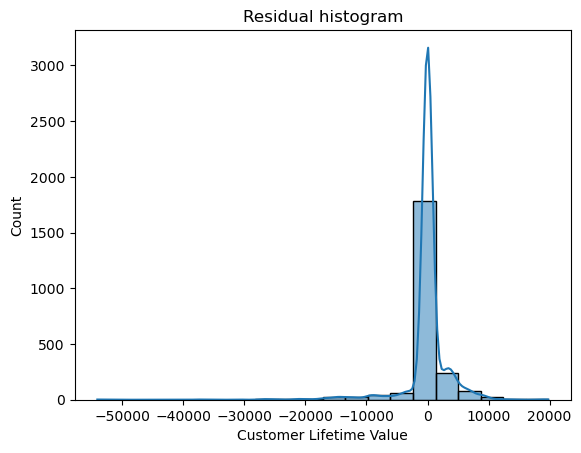

In [162]:
import seaborn as sns
sns.histplot(best_model_residuals, bins=20, kde=True)
plt.title("Residual histogram")
plt.show()

The residuals cluster around 0 with the larger residuals becoming less common. Now lets look at where the bulk of the acutal LTV values lie, i.e. below 10,000.

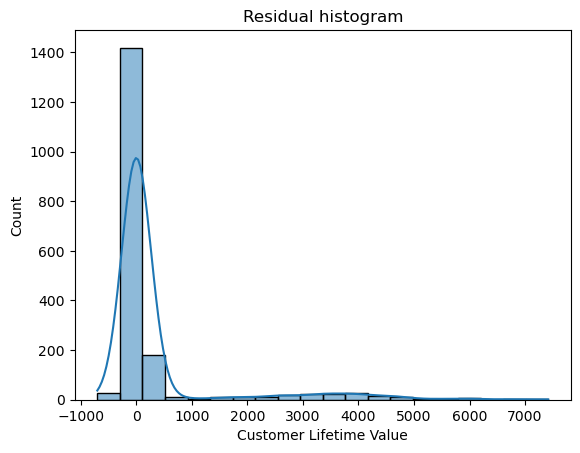

In [163]:
mask = y_test < 10000
y_test_trim = y_test[mask]
y_pred_trim = y_pred[mask]
residuals_trimed = y_pred_trim - y_test_trim

import seaborn as sns
sns.histplot(residuals_trimed, bins=20, kde=True)
plt.title("Residual histogram")
plt.show()

In [164]:
print("RMSE of only using real LTVs of under 10000 is",np.round(root_mean_squared_error(y_test_trim, y_pred_trim),2))


RMSE of only using real LTVs of under 10000 is 1169.28


The residuals get are less when predicting LTV where the real LTV are also low. This is positive as it shows the larger errors are where the actual LTV is already higher.

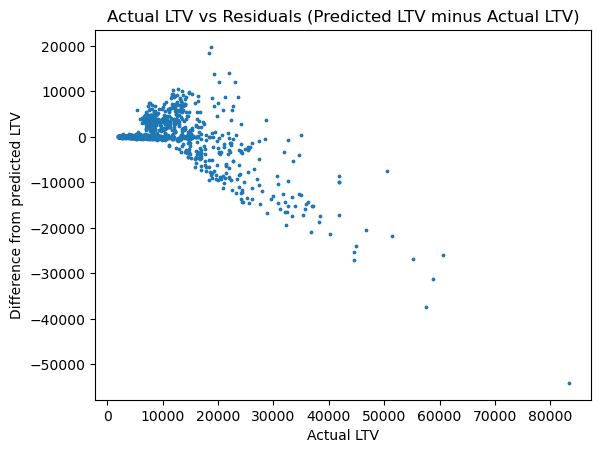

In [165]:
plt.scatter(y_test,best_model_residuals,s = 3)
plt.xlabel("Actual LTV")
plt.ylabel("Difference from predicted LTV")
plt.title("Actual LTV vs Residuals (Predicted LTV minus Actual LTV)")
plt.show()

In the scatterplot over estimates appear between actual LTV values of 8,000 to 20,000. Underestimates occur from where the real LTV values are above 10,000. I believe this is satisfactory.

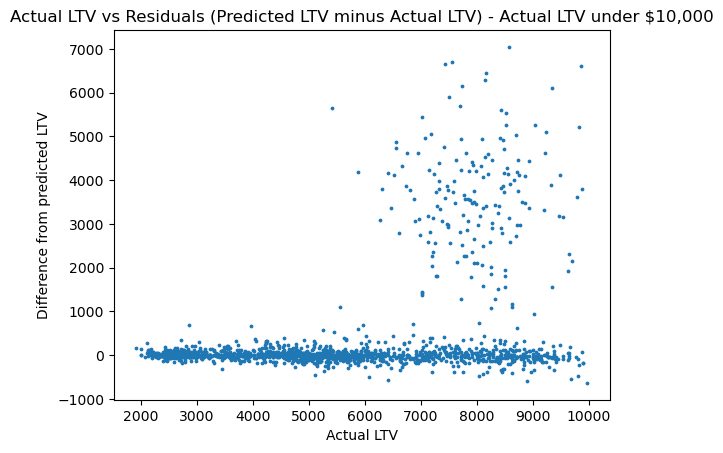

In [109]:
# Now lets look at residuals where real LTV is below 10,000 USD
plt.scatter(y_test_trim,residuals_trimed,s = 3)
plt.xlabel("Actual LTV")
plt.ylabel("Difference from predicted LTV")
plt.title("Actual LTV vs Residuals (Predicted LTV minus Actual LTV) - Actual LTV under $10,000")
plt.show()

The RMSE when looking at only real LTV values (y_test) of under 10,000 USD is lower than when calculating it for the whole data set. This makes the RMSE of the proposed model more acceptable to use in production in way I intended to use it (i.e. being fed as revenue figures back into the Ads platforms). In the scatterplot above most residuals for real LTV values of under 10,000 were below 500 though there is a spate of over predictions above for real LTV values of over 6,000.

In [121]:
residuals_trimed_count = residuals_trimed > 500
print(residuals_trimed_count.sum(), "out of", residuals_trimed_count.count(), "had a residual of over 500")

182 out of 1808 had a residual of over 500


In [122]:
residuals_trimed_count = residuals_trimed < -500
print(residuals_trimed_count.sum(), "out of", residuals_trimed_count.count(), "had a residual of under -500")

4 out of 1808 had a residual of under -500


In [123]:
# Now lets run some classic statistics to check the predicted LTVs appear in the same order as the actual LTVs

from scipy.stats import spearmanr

# Example: comparing two ranked variables
rho, pval = spearmanr(y_test, y_pred)

print(f"Spearman correlation: {rho:.3f}")
print(f"P-value: {pval:.3f}")

Spearman correlation: 0.981
P-value: 0.000


In [124]:
# Now is using these LTV calculations any better than simply using monthly premium

from scipy.stats import spearmanr

# Example: comparing two ranked variables
rho, pval = spearmanr(y_test, X_test["Monthly Premium Auto"])

print(f"Spearman correlation: {rho:.3f}")
print(f"P-value: {pval:.3f}")

Spearman correlation: 0.457
P-value: 0.000


Using spearman rank correlation shows that the predicted LTVs are pretty much in order of the actual LTVs. I've also established that the order of the predicted LTVs are far more closer to the order of the real LTV than just using the order of Monthly Premium Auto column values.

# 6. Model Interpretation

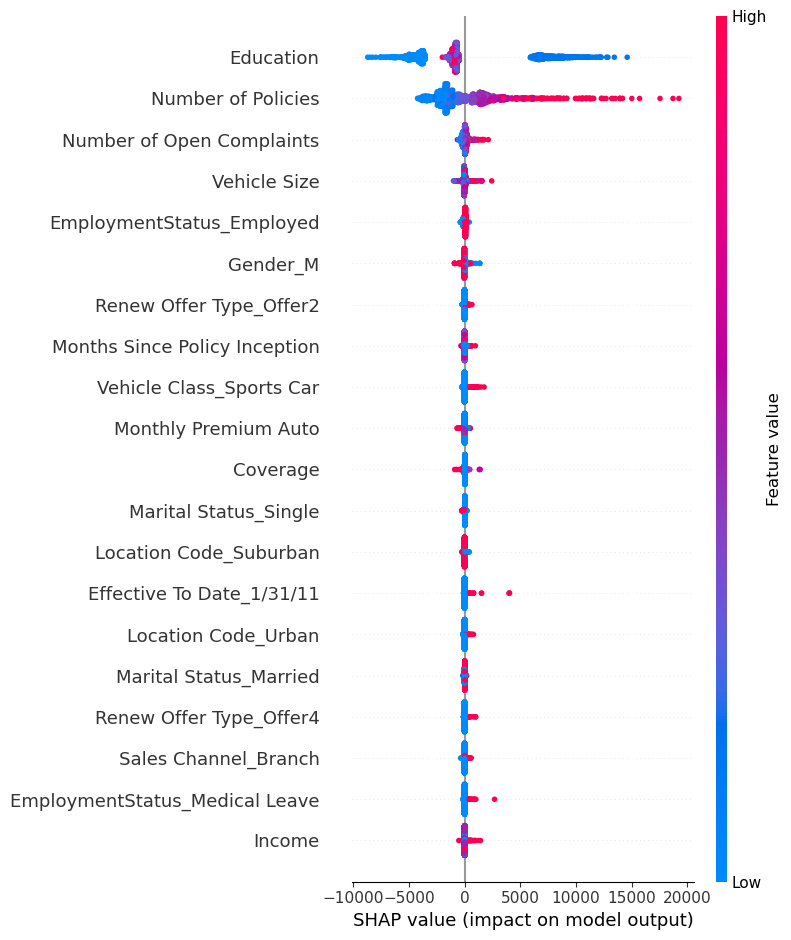

In [125]:
import shap

explainer = shap.Explainer(best_model)
shap_values = explainer(X_test_processed_df)

shap.summary_plot(shap_values, X_test_processed_df)

In [126]:
# Get importance scores
X_train_processed_ = preprocessor.fit_transform(X_train)
importances = best_model.feature_importances_
# Map them to feature names
feature_names = preprocessor.get_feature_names_out()
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
importance_df.head(50)

,Feature,Importance
7,num__Number of Policies,0.508488
4,num__Monthly Premium Auto,0.254589
5,num__Months Since Policy Inception,0.027656
3,num__Income,0.026283
2,ord__Education,0.009258
70,cat__Effective To Date_2/9/11,0.005625
75,cat__Gender_M,0.005537
0,ord__Vehicle Size,0.005486
6,num__Number of Open Complaints,0.004562
1,ord__Coverage,0.004175


The Shap library puts Education as the most important explainer but when pulling importances from the model Education is ranked far lower. Just pulling importances from the model ranks the number of policies and monthly premium at the top of explainer. It's worth noting that whilst the correlation of number of policies vs actual LTV was low in our original analysis, it was the most important feature when pulling out the most important features from the best model.

# 7. Results

After testing different models, and then optimising hyperparameters we have acheived a model with a RMSE 3,737 when using the kfold method and 2,153 when using a simple test train split method. This model was a Random Forest Regressor with parameters of max_depth
: 15, max_features: None, min_samples_split: 2, n_estimators: 200 and all the other parameters were default ones. RMSE could be seen as the average deviation from the true value. If we had simply applied the average mean to every prediced LTV value we would have a RMSE of 7,051.87.  Creating the model improved the predicted LTV compared to just taking the mean average. When I looked at the RMSE on real LTVs of under 10,000 USD the RMSE fell to 1300.83. The predicted LTVs that were most out of kilter were the ones where actual LTVs were already large. I believe this is acceptable it would still be enough to signal to the Ads platforms that sales in these audience segments are higher than average. There are some over estimates in the area of 6,000 - 10,000. For those actual LTVs under 6,000 almost all the residuals between the acutal figures and the predicted ones are well below 1,000 or even 500.

# 9. Conclusion

The model we created would be usable to feed back as revenue values to Ads platforms however having run this project using this data I have realised it's not ideal to use for calculating lifetime values of customers when they transact. This data was most probably drawn from a marketing database and provided LTVs to date for customers. What we really wanted is "first contact" data based on data you'd receive when a transation goes through. For customers already on the database we want to predict the additional LTV value of the customer from that particular transaction. By feeding the whole LTV of existing customers every time there is a transation into Google we could be pushing Google's bidding algorithm astray and over estimating the value of some segments in their system. So in short we could end up with worse results measured by classic marketing metrics such as ROAS, CPA and Sales Volume. Therefore instead having of a dataset with each row being a customer, we'd preferably have a dataset with each row being a transaction and the LTV column being the LTV value that that transaction bought in, rather the LTV value so far of the customer.

This project has served it's purpose as a way exploring the stages of a machine learning project. Thank you for reading.

# 8. Save Model

In [120]:
import pickle
import joblib

preprocessor_filename = "preprocessor.pkl"
with open(preprocessor_filename, "wb") as file:
    pickle.dump(preprocessor, file)

# Save the trained model to a file so it can be used later for predictions
model_filename = "random_forest_best_model.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(best_model, file)

print("Saved successfully!")

Saved successfully!
